In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the dataset
df = pd.read_csv('Airbnb_data - airbnb_data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
#EDA
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [9]:
df.dropna(inplace=True)
df.dropna(subset=['bathrooms', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 'bedrooms', 'beds'], inplace=True)

In [12]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,3.850200e+04,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000
mean,1.123236e+07,4.745546,3.233754,1.215197,38.759075,-90.895232,32.975014,94.332217,1.252402,1.759259
std,6.084071e+06,0.658015,2.137687,0.551349,3.007696,21.446666,45.420254,6.876715,0.836481,1.287905
min,9.410000e+02,0.000000,1.000000,0.000000,33.705835,-122.511500,1.000000,20.000000,0.000000,0.000000
25%,6.233497e+06,4.304065,2.000000,1.000000,34.185077,-118.326008,5.000000,92.000000,1.000000,1.000000
50%,1.218796e+07,4.700480,2.000000,1.000000,40.682550,-74.001777,16.000000,96.000000,1.000000,1.000000
75%,1.638125e+07,5.164786,4.000000,1.000000,40.760402,-73.949291,42.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-71.000462,542.000000,100.000000,10.000000,18.000000


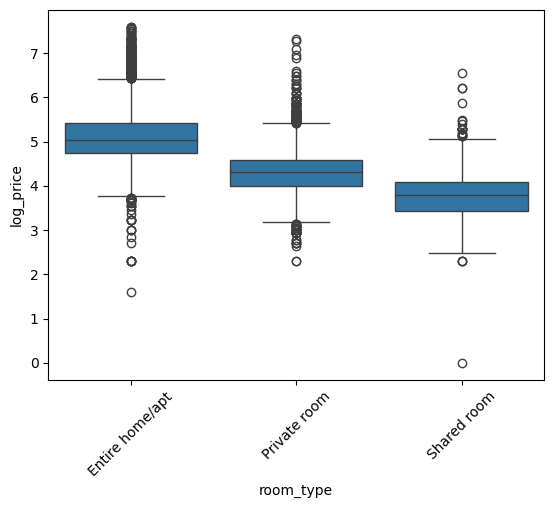

In [15]:
sns.boxplot(x='room_type', y='log_price', data=df)
plt.xticks(rotation=45)
plt.show()

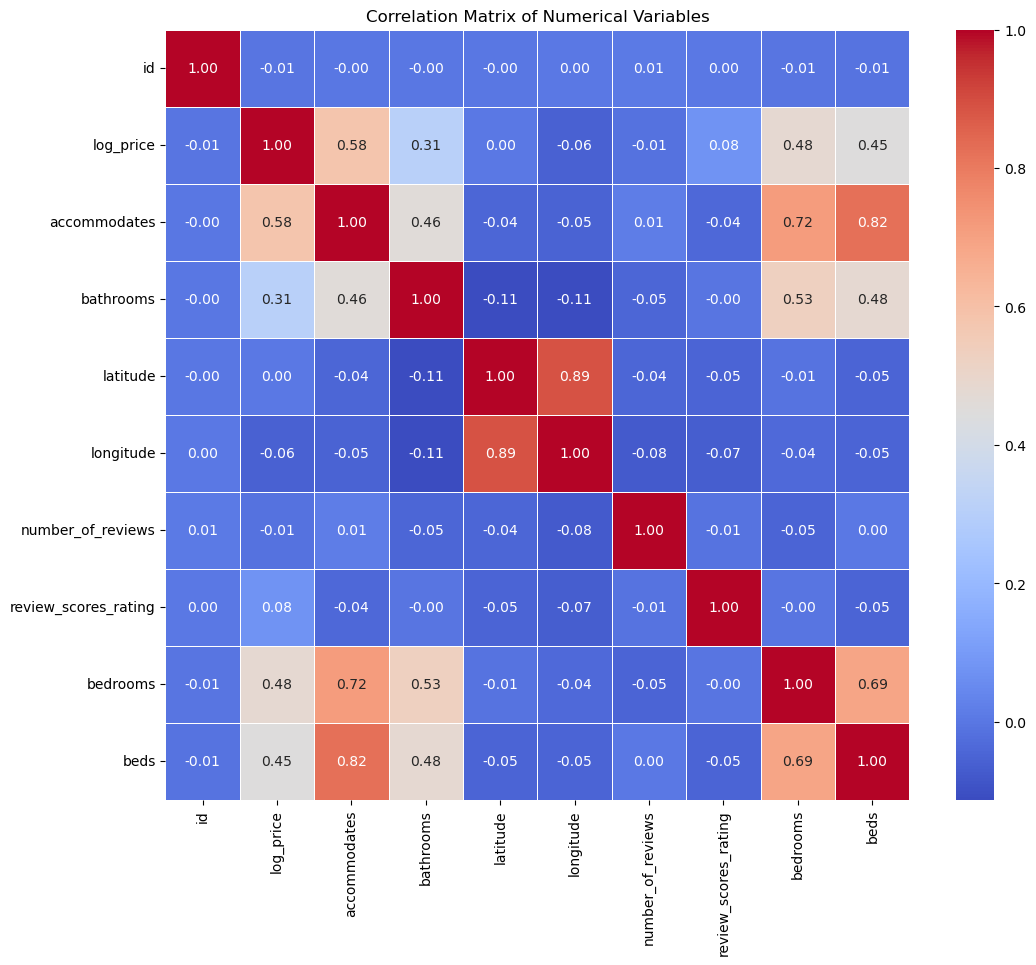

In [16]:
# correlation matrix
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

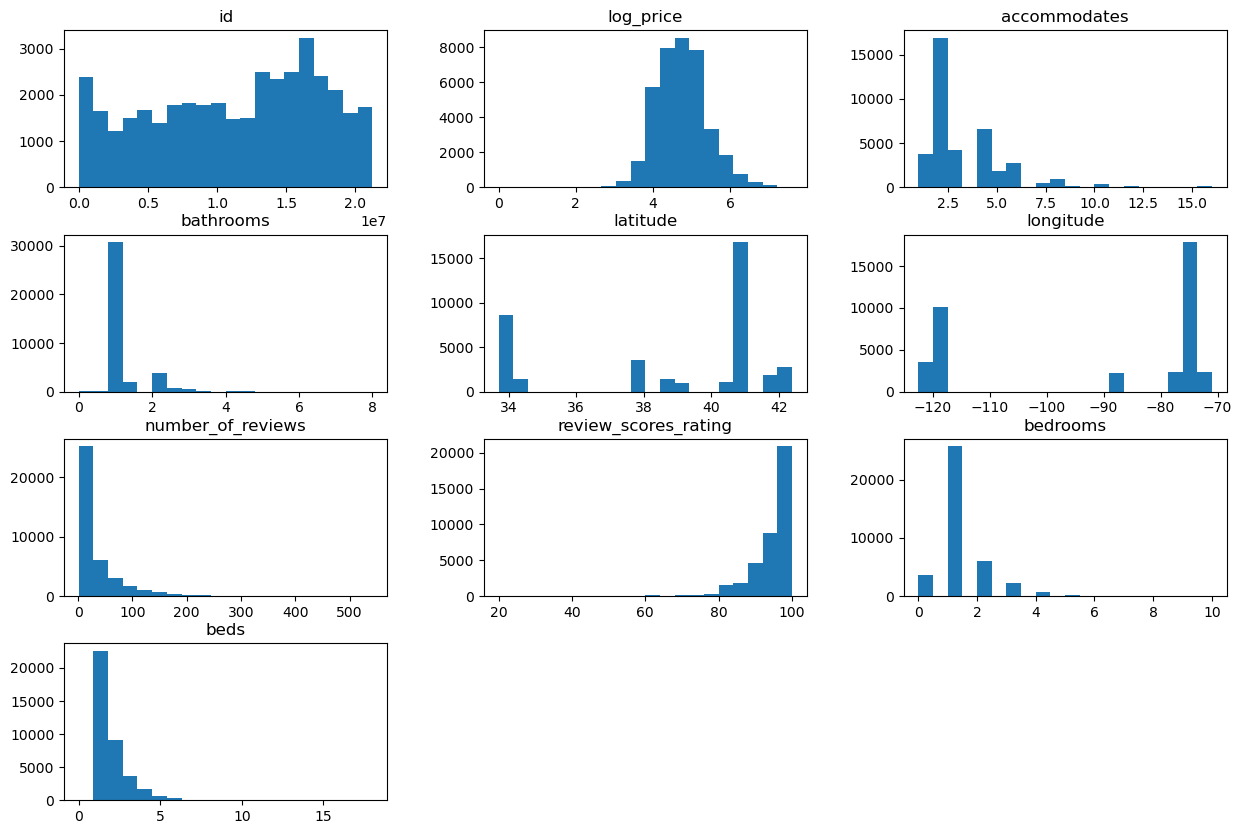

In [17]:
df.hist(figsize=(15,10), bins=20, grid=False)
plt.show()

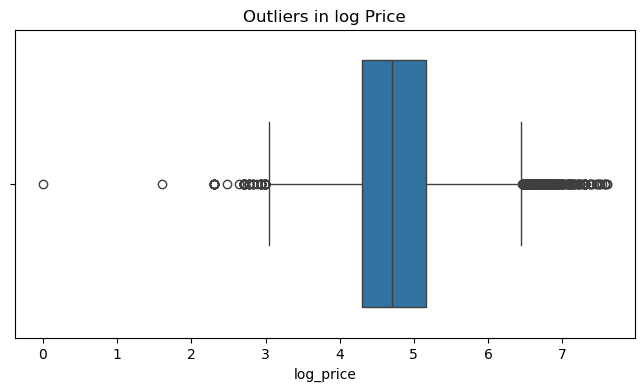

In [19]:
# boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['log_price'])
plt.title('Outliers in log Price')
plt.show()

In [20]:
# simple linear regression
x = df[['accommodates']]  #predictor
y = df['log_price']   #target

In [21]:
#splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
simple_model = LinearRegression()
simple_model.fit(x_train, y_train)

#predictions
y_pred = simple_model.predict(x_test)

#evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.2817119841015721
R^2 Score: 0.34002892282620456


In [25]:
# multiple linear regression
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
categorical_cols = ['room_type', 'cancellation_policy', 'property_type']
boolean_cols = ['cleaning_fee', 'instant_bookable']
target = 'log_price'
data = df[numerical_cols + categorical_cols + boolean_cols + [target]].copy()
data.head()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,room_type,cancellation_policy,property_type,cleaning_fee,instant_bookable,log_price
1,7,1.0,3.0,3.0,93.0,Entire home/apt,strict,Apartment,True,t,5.129899
2,5,1.0,1.0,3.0,92.0,Entire home/apt,moderate,Apartment,True,t,4.976734
5,2,1.0,1.0,1.0,100.0,Private room,strict,Apartment,True,t,4.442651
7,2,1.0,1.0,1.0,93.0,Entire home/apt,moderate,Condominium,True,f,4.787492
8,2,1.0,1.0,1.0,99.0,Private room,moderate,House,True,f,4.787492


In [35]:
cleanup_map = {
    't': 1, 'T': 1, 'true': 1, 'True': 1, True: 1, 1: 1,
    'f': 0, 'F': 0, 'false': 0, 'False': 0, False: 0, 0: 0
}
for col in boolean_cols:
    data[col] = data[col].map(cleanup_map)
    data[col] = data[col].astype(int)

In [36]:
data.head()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,cleaning_fee,instant_bookable,log_price,room_type_Private room,room_type_Shared room,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
1,7,1.0,3.0,3.0,93.0,1,1,5.129899,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5,1.0,1.0,3.0,92.0,1,1,4.976734,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2,1.0,1.0,1.0,100.0,1,1,4.442651,True,False,...,False,False,False,False,False,False,False,False,False,False
7,2,1.0,1.0,1.0,93.0,1,0,4.787492,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,1.0,1.0,1.0,99.0,1,0,4.787492,True,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
remaining_bools = data.select_dtypes(include=['bool']).columns
data[remaining_bools] = data[remaining_bools].astype(int)
data.head()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,cleaning_fee,instant_bookable,log_price,room_type_Private room,room_type_Shared room,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
1,7,1.0,3.0,3.0,93.0,1,1,5.129899,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1.0,1.0,3.0,92.0,1,1,4.976734,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1.0,1.0,1.0,100.0,1,1,4.442651,1,0,...,0,0,0,0,0,0,0,0,0,0
7,2,1.0,1.0,1.0,93.0,1,0,4.787492,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,1.0,1.0,1.0,99.0,1,0,4.787492,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#spliting into train and test
target_column = 'log_price'
x_multi=data.drop(target_column, axis=1)
y_multi=data[target_column]
x_train_multi,x_test_multi,y_train_multi,y_test_multi = train_test_split(x_multi,y_multi,test_size=0.2, random_state=42)

In [43]:
#creating model

multi_model = LinearRegression()
multi_model.fit(x_train_multi, y_train_multi)

#predictions
y_pred_multi = multi_model.predict(x_test_multi)

In [44]:
print(f'Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}')
print(f'R^2 Score: {r2_score(y_test_multi, y_pred_multi)}')

Mean Squared Error: 0.18331772440803298
R^2 Score: 0.5705386960073476


In [48]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_multi,y_train_multi)
rf_y_pred = rf_model.predict(x_test_multi)
print(f'Random Forest Mean Squared Error: {mean_squared_error(y_test_multi, rf_y_pred)}')
print(f'Random Forest R^2 Score: {r2_score(y_test_multi, rf_y_pred)}')

Random Forest Mean Squared Error: 0.19501864572865515
Random Forest R^2 Score: 0.5431267643760949


In [50]:
# by adding lattitude & longitude variable 
#spliting into train and test
data['latitude'] = df['latitude']
data['longitude'] = df['longitude']
target_column = 'log_price'
x_rf=data.drop(target_column, axis=1)
y_rf=data[target_column]
x_train_rf,x_test_rf,y_train_rf,y_test_rf = train_test_split(x_rf,y_rf,test_size=0.2, random_state=42)

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_rf, y_train_rf)
rf_pred = rf_model.predict(x_test_rf)
print(f'Random Forest Mean Squared Error: {mean_squared_error(y_test_rf, rf_pred)}')
print(f'Random Forest R^2 Score: {r2_score(y_test_rf, rf_pred)}')

Random Forest Mean Squared Error: 0.1064582529002687
Random Forest R^2 Score: 0.7505985836395996
